In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Files/creditcard.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
pd.value_counts(dataset['Class'])

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: ylabel='count'>

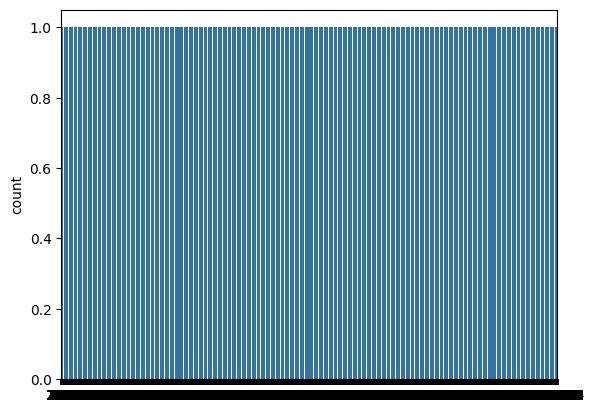

In [ ]:
sns.countplot(dataset['Class'])

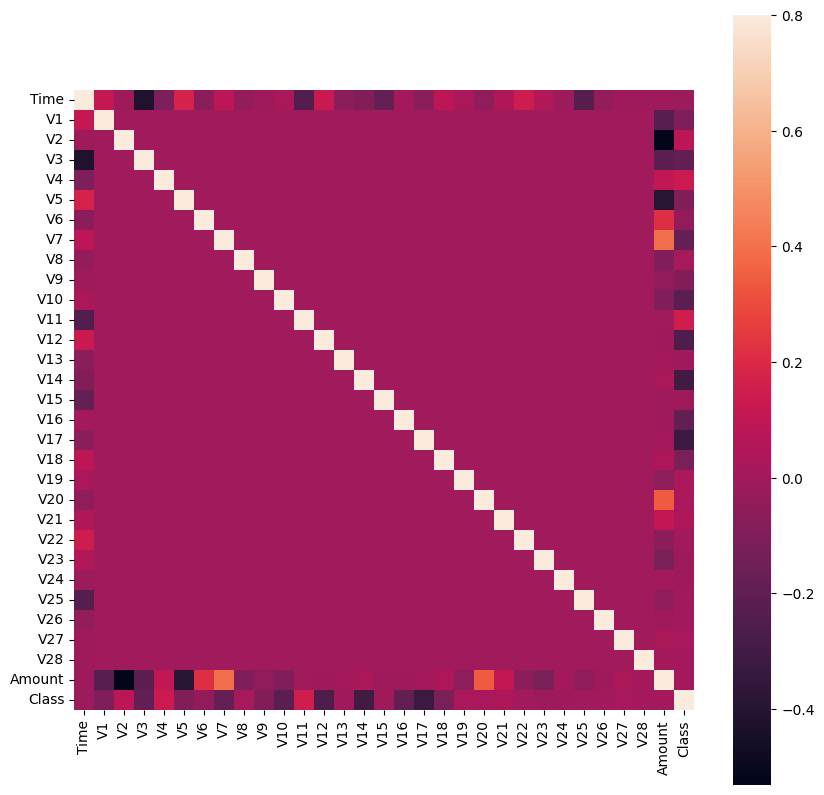

In [8]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()

In [9]:
len(dataset[dataset['Class']==0])

284315

In [10]:
len(dataset[dataset['Class']==1])

492

In [11]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(X, y)


In [14]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [15]:
X.shape

(284807, 30)

In [16]:
X_resampled.shape

(568630, 30)

In [17]:
from collections import Counter
print(Counter(y))
print(Counter(y_resampled))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X_resampled , y_resampled)

In [20]:
x_train.shape

(426472, 30)

In [23]:
y_train.shape

(426472,)

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641 , random_state=0)
classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
n_errors = (y_pred != y_test).sum()

In [27]:
n_errors

7

In [28]:
y_test.shape

(142158,)

0.9999507590146175


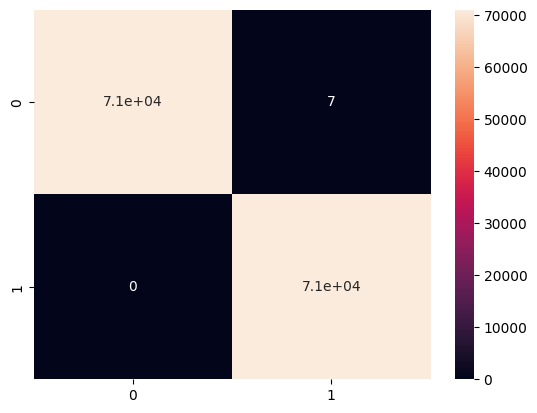

In [29]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

0.9999014695118518

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

1.0

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71121
           1       1.00      1.00      1.00     71037

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

